# HW3 - Scraping and Regression

In [111]:
# initial setup

from bs4 import BeautifulSoup
import urllib.request
import requests
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

### Part 1 - Data Acquisition

In [112]:
# url = "https://amarioguy.github.io/m1windowsproject/"

# # here we actually access the website
# with urllib.request.urlopen( url ) as response:
#     html = response.read()
#     html = html.decode( 'utf-8' )

# # save the file
# with open( 'm1windowsproject.html', 'w' ) as new_file:
#     new_file.write(html)

# soup = BeautifulSoup( html, 'html.parser' )

# store data in arrays
rank = []
title_length = []
age_hours = []
points = []
comments_num = []

def scraper(url, n_pages) :

    webpage = requests.get(f"{url}{n_pages}")
    soup = BeautifulSoup(webpage.content, 'html.parser')

    # scrape rank
    for hit in soup.find_all("span", class_="rank") :      
        rank.append(int(hit.text.strip().replace(".", "")))

    # scrape length of title
    for hit in soup.find_all("a", class_="titlelink") :
        title_length.append(len(hit.text.strip()))

    # enter tablerow for age, points, and comments
    for row in soup.find_all("td", class_="subtext") :

        # scrpe age in hours
        hit_age = row.find("span", class_="age").find("a")
        if "minute" in hit_age.text :
            age_hours.append(float(hit_age.text.strip().replace(" minute ago", "").replace(" minutes ago", ""))/60)

        if "hour" in hit_age.text :
            age_hours.append(float(hit_age.text.strip().replace(" hour ago", "").replace(" hours ago", "")))

        if "day" in hit_age.text :
            age_hours.append(float(hit_age.text.strip().replace(" day ago", "").replace(" days ago", ""))*24)

        if hit_age is None :
            age_hours.append(0)

        print(f"{hit_age.text} {age_hours[-1]}")

        # scrape points
        hit_points = row.find("span", class_="score")
        if hit_points is None :
            points.append(0)
        else :
            points.append(int(hit_points.text.strip().replace(" points", "").replace(" point", "")))

        # scrape number of comments
        hit_comments = row.find_all("a")[-1]
        if "comments" in  hit_comments.text :
            comments_num.append(int(hit_comments.text.strip().replace(u'\xa0', u' ').replace(" comments", "").replace(" comment", "")))
        else :
            comments_num.append(0)

    if n_pages == 0 :
        return
    else :
        scraper(url, n_pages - 1)


In [113]:
# restart the function by modifying the url with the next logical one

# pass url here:
url = "https://news.ycombinator.com/news?p="


scraper(url, n_pages=5)


2 hours ago 2.0
8 hours ago 8.0
2 hours ago 2.0
8 hours ago 8.0
1 day ago 24.0
1 day ago 24.0
21 hours ago 21.0
1 day ago 24.0
23 hours ago 23.0
5 hours ago 5.0
21 hours ago 21.0
17 hours ago 17.0
20 hours ago 20.0
6 hours ago 6.0
7 hours ago 7.0
6 hours ago 6.0
23 hours ago 23.0
3 days ago 72.0
1 day ago 24.0
3 hours ago 3.0
5 hours ago 5.0
4 hours ago 4.0
7 hours ago 7.0
1 day ago 24.0
1 day ago 24.0
1 day ago 24.0
1 day ago 24.0
1 day ago 24.0
1 day ago 24.0
1 day ago 24.0
5 hours ago 5.0
16 hours ago 16.0
1 day ago 24.0
1 day ago 24.0
4 hours ago 4.0
22 hours ago 22.0
15 hours ago 15.0
6 hours ago 6.0
3 hours ago 3.0
5 hours ago 5.0
18 hours ago 18.0
4 hours ago 4.0
1 hour ago 1.0
1 day ago 24.0
6 hours ago 6.0
19 hours ago 19.0
2 hours ago 2.0
2 days ago 48.0
20 hours ago 20.0
9 hours ago 9.0
21 hours ago 21.0
3 hours ago 3.0
4 hours ago 4.0
1 day ago 24.0
11 hours ago 11.0
8 hours ago 8.0
1 day ago 24.0
1 day ago 24.0
7 hours ago 7.0
13 hours ago 13.0
6 hours ago 6.0
15 hours ago

In [126]:
# verify that all columns are the same length (150)

# print(age_hours)
# print(len(age_hours))

### Part 2 - Regression

In [115]:
dataset = pd.DataFrame({'points' : points, 'rank' : rank, 'title_length' : title_length, 'age_hours' : age_hours, 'comments_num' : comments_num})

dataset

,points,rank,title_length,age_hours,comments_num
0,4,121,17,2.0,0
1,88,122,36,8.0,117
2,3,123,33,2.0,0
3,3,124,66,8.0,0
4,150,125,50,24.0,31
...,...,...,...,...,...
145,96,26,37,11.0,94
146,278,27,72,6.0,248
147,92,28,49,11.0,18
148,60,29,33,8.0,17


In [121]:
# rank against points

results = smf.ols('rank ~ points', data=dataset).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3657
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.546
Time:                        17:39:49   Log-Likelihood:                -777.88
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.9751      4.311     17.855      0.000      68.456      85.494
points        -0.0121      0.020     -0.605      0.546      -0.052       0.027
==============================================================================
Omnibus:                       66.528   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.244
Skew:                          -0.000   Prob(JB):                      0.00983
Kurtosis:                       1.784   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# rank against number of comments

results3 = smf.ols('rank ~ comments_num', data=dataset).fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8076
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.370
Time:                        17:40:53   Log-Likelihood:                -777.66
No. Observations:                 150   AIC:                             1559.
Df Residuals:                     148   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       77.4995      4.189     18.500      0.000      69.221      85.778
comments_num    -0.0321      0.036     -0.899      0.370      -0.103       0.038
==============================================================================
Omnibus:                       66.232   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.256
Skew:                          -0.032   Prob(JB):                      0.00978
Kurtosis:                       1.785   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# rank compared with age in hours

results2 = smf.ols('rank ~ age_hours', data=dataset).fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     26.32
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.93e-07
Time:                        17:41:46   Log-Likelihood:                -765.79
No. Observations:                 150   AIC:                             1536.
Df Residuals:                     148   BIC:                             1542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.3360      4.826     11.881      0.000      47.799      66.873
age_hours      1.5168      0.296      5.130      0.000       0.933       2.101
==============================================================================
Omnibus:                       31.592   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.304
Skew:                           0.102   Prob(JB):                       0.0259
Kurtosis:                       1.938   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept    57.335971
age_hours     1.516815
dtype: float64


(0.0, 72.0)

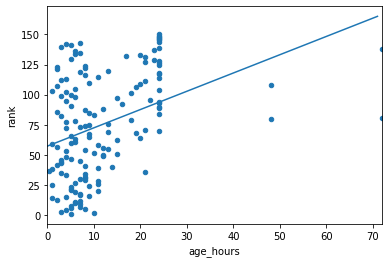

In [141]:
# regress "expression" onto "motifScore" (plus an intercept)
p = results2.params
print(p)

ax = dataset.plot(x='age_hours', y='rank', kind='scatter')
# plot regression line on the same axes, set x-axis limits
x=list(range(72))
ax.plot(x, p.Intercept + p.age_hours * np.float64(x))
ax.set_xlim([0, 72])

#### Analysis

The most useful regression compares rank against age in hours, which makes up for 
15% of the ranking according to its R2. 

The least useful are the comments and points. The R2 in comments and points was very low and did not signify a correlation between either comments or points and the ranking. 

At 0, the value of the Intercept coefficient is 57.3360. And as each hour increases, the ranking increases by 1.5168. This shows that this relation is statistically significant. 

The p-value is 0 for both Intercept and age_hours variable. The p-value shows the chance that this relation happened by chance. The p-value being 0 shows that the relationship between age_hours and rank is statistically significant, because it means that it's unlikely to come about by accident. 

The age in hours and rank is not quite linear, but is also not nonexistent. There is a clear positive trend, but it's probably not linear.

### Part 3 - Classification